In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import spacy
from spacy.lang.es.examples import sentences 


nlp = spacy.load('C:\ProgramData\Miniconda3\Lib\site-packages\es_core_news_lg\es_core_news_lg-3.2.0')

In [3]:
tweets = pd.read_csv("tweets_volcan_es_2.csv", header=None, names=['tweet'], encoding='latin-1')
tweets = tweets.dropna()
tweets.columns = [ 'text']

tweets.drop_duplicates(subset ='text', keep = False, inplace = True) 
tweets.head()

,text
1,b'@rajote Ciertamente no veo protestas por el ...
2,"b'Terremoto de 4,9 en la isla espanola del vol..."
3,b'@EmmaRincon Por favor no puedo leer estas co...
4,"b'Ademas, el sismografo del Instituto Geografi..."
5,"b'Con respecto a que estadio pesa mas,si el vo..."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 1 to 5626
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5512 non-null   object
dtypes: object(1)
memory usage: 86.1+ KB


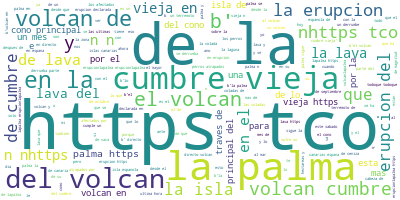

In [11]:
import re
# Remove punctuation

tweets['paper_text_processed'] = \
tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
tweets['paper_text_processed'] = \
tweets['paper_text_processed'].map(lambda x: x.lower())

# Remove stop words?¿?¿?¿
#import re
#from nltk.corpus import stopwords

#important_words=[]
#for paper in papers:
 #   if paper not in stopwords.words('spanish'):
  #      important_words.append(papers)

#print (important_words)

# Print out the first rows of papers
tweets['paper_text_processed'].head()
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.

long_string = ','.join(list(tweets['paper_text_processed'].values))
#long_string = ','.join(list(papers['important_words'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [29]:
from spacy.tokenizer import Tokenizer
all_stopwords = nlp.Defaults.stop_words
all_stopwords=nlp.Defaults.stop_words= {"no","cumbre","https"}
tokenizer = nlp.tokenizer

text_tokens = tokenizer(long_string)
tokens_without_sw= [word for word in text_tokens if not word in all_stopwords]
#print(tokens_without_sw)

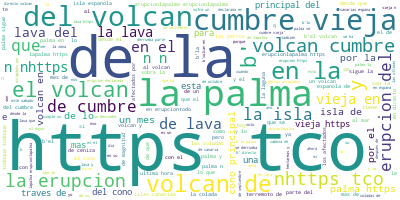

In [33]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
#text2= "".join(tokens_without_sw)
#text2 = bytearray([self.byte_decoder[c] for c in text]).decode("utf-8", errors=self.errors)
#long_string2 = ','.join(list(tokens_without_sw['paper_text_processed'].values))
#!pip install nltk
text2=''.join(token.text_with_ws for token in tokens_without_sw)
#from nltk.tokenize.treebank import TreebankWordDetokenizer
#text2=TreebankWordDetokenizer().detokenize([tokens_without_sw])
wordcloud.generate(text2)
# Visualize the word cloud
wordcloud.to_image()